# 캡스톤 디자인 최종발표

## Title : BERTopic을 이용한 유튜브 인기 급상승 동영상 분석
### AI융합학부 20170363 박준석

### Font Setting

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font_name = fm.FontProperties(fname=path, size=14).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumMyeongjo


### BERTopic과 한글 분석에 사용될 Tool import

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Mecab
from bertopic import BERTopic
import pandas as pd

/home/joon/.local/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/joon/.local/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/joon/.local/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nop

### 유튜브 데이터 로드 및 텍스트 데이터 전처리

In [3]:
entertainment = pd.read_csv('1.csv')
blog = pd.read_csv('2.csv')

entertainment['tags'] = entertainment['tags'].str.replace('|', ' ')
blog['tags'] = blog['tags'].str.replace('|', ' ')

ent_tags = entertainment['tags'].to_list()
blog_tags = blog['tags'].to_list()
ent_timestamp = entertainment['trending_date'].to_list()
blog_timestamp = blog['trending_date'].to_list()

### 전처리된 Youtube Trend data(Entertainment)

In [4]:
entertainment

trending_date   
0      2020-08-12 00:00:00+00:00  \
1      2020-08-12 00:00:00+00:00   
2      2020-08-12 00:00:00+00:00   
3      2020-08-12 00:00:00+00:00   
4      2020-08-12 00:00:00+00:00   
...                          ...   
63951  2023-03-23 00:00:00+00:00   
63952  2023-03-23 00:00:00+00:00   
63953  2023-03-23 00:00:00+00:00   
63954  2023-03-23 00:00:00+00:00   
63955  2023-03-23 00:00:00+00:00   

                                                    tags  
0                                              보겸 bokyem  
1      꽈뚜룹 한국여행기 quaddurup 뚜룹이 korea southkorea vlog ...  
2                                    진심으로 사과드립니다. 죄송합니다.  
3      ASMR 홍사운드 eatingsound eating 리얼사운드 이팅사운드 먹는소리 ...  
4      소향 헨리 하림 적재 정승환 크러쉬 beginagainkorea Sohyang He...  
...                                                  ...  
63951           파뿌리 강호이 박씨집안 박씨 가족 아빠 엄마 박강훈 가족예능 효도 부모님  
63952  알고보면 모닝와이드 모닝와이드3부 미스터리 미스터리M 삼봉해수욕장 무덤 기이한묘지 ...  
63953      부부 결혼 김계정 계정 김아내 김딸 발렌타인 화이트데이 초콜릿 사탕 초콜렛 기념일  
63954            파뿌리 예능 게임 GAME 오락 버라이어티 variety 웹예능 플레이  
63955  STAYC 스테이씨 스테이시 Teddy Bear 테디베어 Beautiful Mons...  

[63956 rows x 2 columns]

### 전처리된 Youtube Trend data(Blog)

In [5]:
blog

trending_date   
0      2020-08-12 00:00:00+00:00  \
1      2020-08-12 00:00:00+00:00   
2      2020-08-12 00:00:00+00:00   
3      2020-08-12 00:00:00+00:00   
4      2020-08-12 00:00:00+00:00   
...                          ...   
29969  2023-03-23 00:00:00+00:00   
29970  2023-03-23 00:00:00+00:00   
29971  2023-03-23 00:00:00+00:00   
29972  2023-03-23 00:00:00+00:00   
29973  2023-03-23 00:00:00+00:00   

                                                    tags  
0      양팡 양팡유튜브 팡튜브 가족시트콤 양팡가족 양팡가족시트콤 양팡언니 현실남매 현실자매...  
1      채널A 채널에이 아침 생활정보 라이프 건강 요리 강연 뉴스 김호중 여자친구 부친 여...  
2      유소나 응큼해 유소나 응큼해 응큼해 유소나 토크 하이라이트 애기븝미짱 애기소나짱 유...  
3      도티 도티 마인크래프트 마인크래프트 도티 마인크래프트 마인크래프트 던전스 마인크래프...  
4      릴카 llilka Lilka 종합게임 종합게임방송 종합게임채널 게임채널 게임 gam...  
...                                                  ...  
29969  효자 효자 정강조 합병증 다이어트 초고도비만 화상 트라우마 정강조 박인숙 화재사고 ...  
29970  🔥일반인 대식가가 도전 신청을 했습니다🔥 제한시간 20분 짬뽕 5그릇 + 짜장면 5...  
29971  백종원 시장 백종원예산 면요리 짬뽕 레시피 백대표 비법 예산 중국집 예산 떡집 시장...  
29972  배말랭 별다먹 백수 자취 핫소스 생존 배씨표류기 원룸 베란다 월세5만원 배건우 자가...  
29973  오사카여행 오사카맛집 야끼니꾸 야키니쿠 오사카야끼니꾸 일본직장인 회사원 오사카에사는...  

[29974 rows x 2 columns]

### 자체 토큰화 클래스(Mecab 형태소 분석기를 이용하여 단어 분해)

In [6]:
class CustomTokenizer:
    def __init__(self, tagger):
        self.tagger = tagger
    def __call__(self, sent):
        sent = sent[:1000000]
        word_tokens = self.tagger.nouns(sent)
        result = [word for word in word_tokens if len(word) > 1]
        return result

In [7]:
custom_tokenizer = CustomTokenizer(Mecab())

In [8]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer, max_features=3000)

### BERTopic Modeling
    + embedding_model : 한글화가 적용된 토큰 임베딩 모델 사용
    + vectorizer : 단어들의 출현 빈도를 카운트하여 여러 문서들을 벡터화, 단어 문서 행렬을 만듦
    + nr_topic : 나타내고자 하는 주제의 수
    + top_n_words : 하나의 주제에 최대로 나타낼 수 있는 단어 수
    + verbose : 표준 정보 출력
    + calculate_probabilities : 주제에 대한 확률 분포 계산

In [9]:
model = BERTopic(embedding_model="sentence-transformers/xlm-r-100langs-bert-base-nli-stsb-mean-tokens", \
                 vectorizer_model=vectorizer,
                 nr_topics=30,
                 top_n_words=10,
                 verbose = True,
                 calculate_probabilities=True)

In [10]:
topics, probs = model.fit_transform(blog_tags)

Batches: 100%|████████████████████████████████| 937/937 [02:04<00:00,  7.50it/s]
2023-05-21 16:37:30,426 - BERTopic - Transformed documents to Embeddings
2023-05-21 16:38:06,982 - BERTopic - Reduced dimensionality


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2023-05-21 17:06:07,850 - BERTopic - Clustered reduced embeddings
2023-05-21 17:06:19,157 - BERTopic - Reduced number of topics from 1099 to 30


### 시간에 따른 토픽 언급도(Entertainment)
    Topic -1은 이상치로 분류
    Topic 0의 빈도가 가장 많은 것을 확인 할 수 있음

937it [00:15, 61.62it/s]


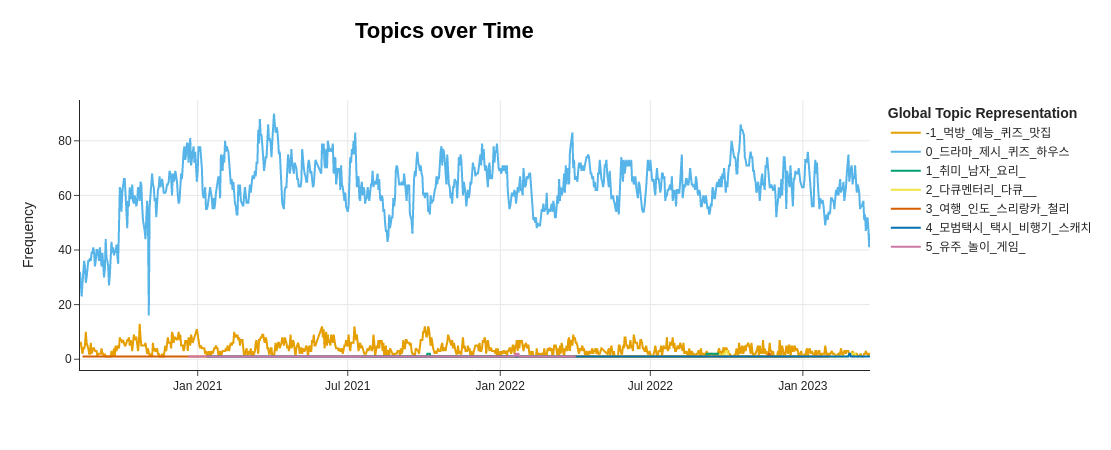

In [18]:
topics_over_time = model.topics_over_time(tags, timestamp)
model.visualize_topics_over_time(topics_over_time, topics=[-1, 0, 1, 2, 3, 4, 5])

### 시간에 따른 토픽 언급도(People & Blog)

937it [00:08, 113.80it/s]


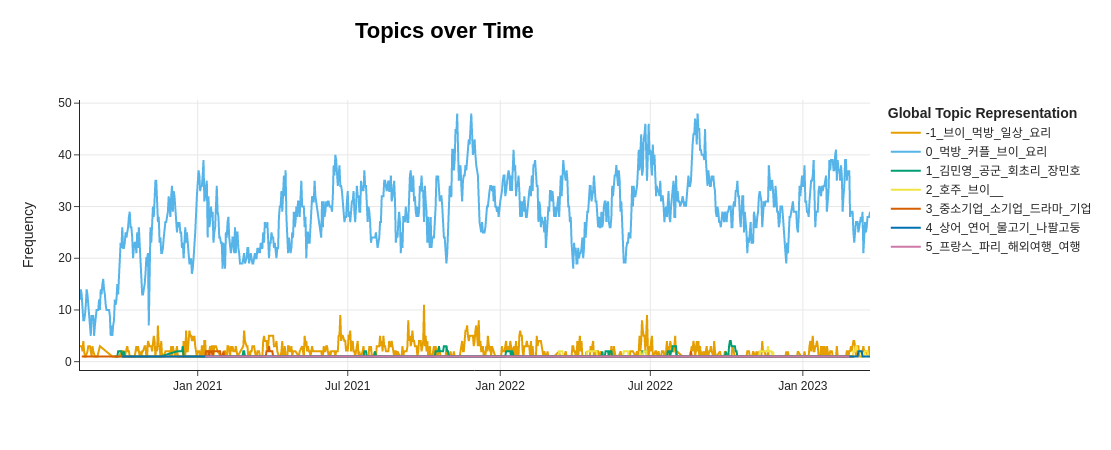

In [11]:
topics_over_time1 = model.topics_over_time(blog_tags, blog_timestamp)
model.visualize_topics_over_time(topics_over_time1, topics=[-1, 0, 1, 2, 3, 4, 5])

### Topic Distance Map(Entertainment)

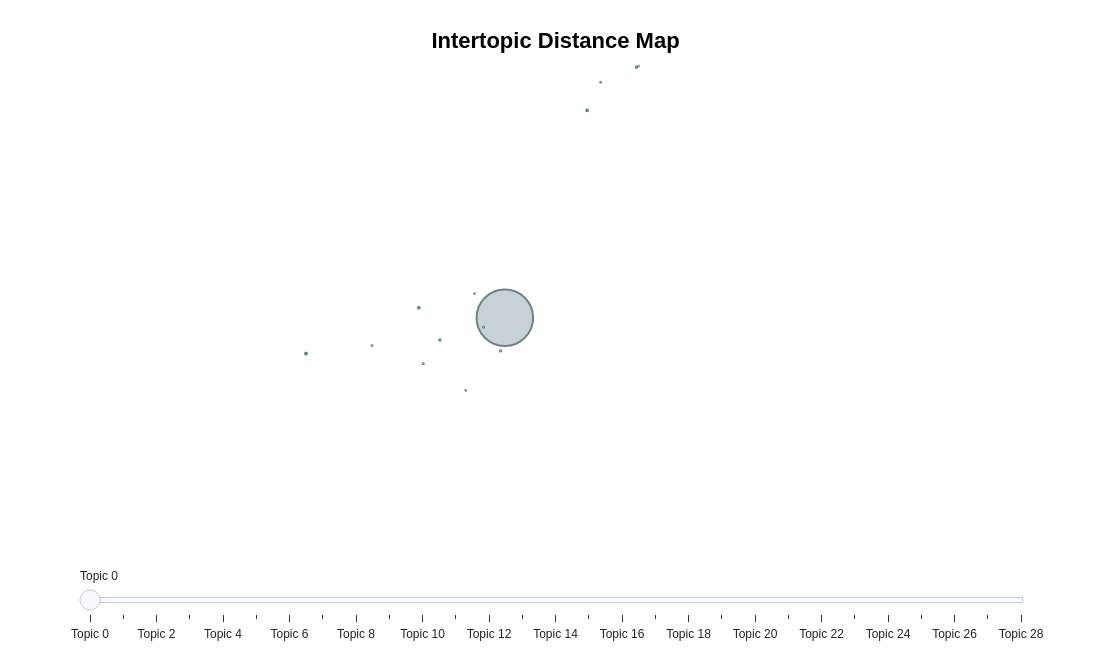

In [19]:
model.visualize_topics()

### Topic Distance Map(People & Blog)

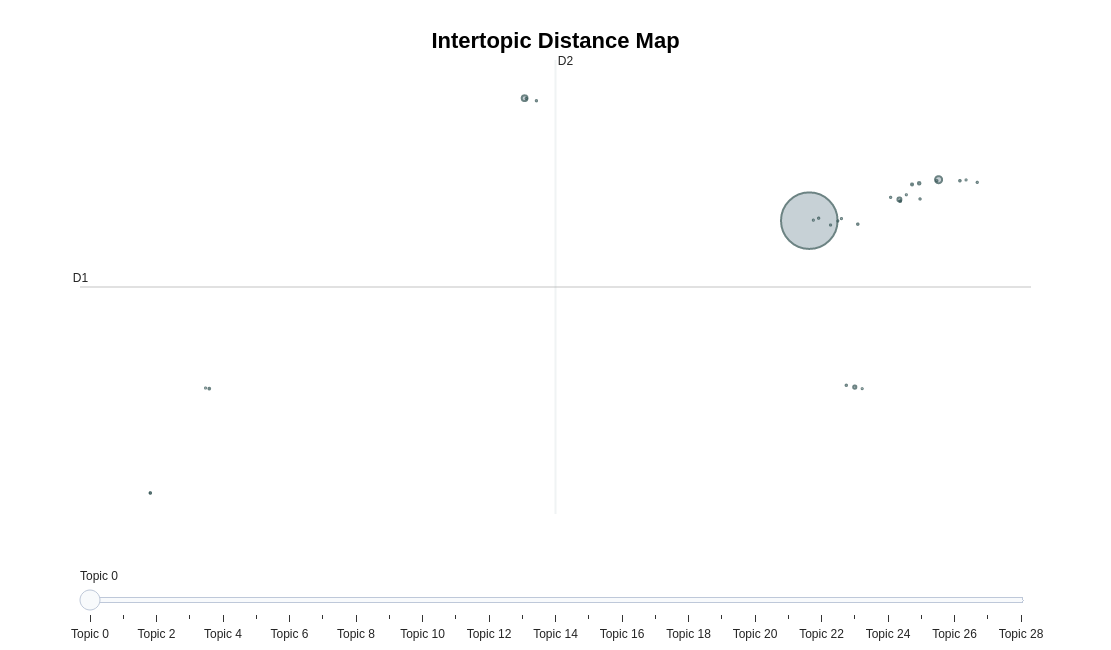

In [12]:
model.visualize_topics()

### Top Topic 30(Entertainment)

In [21]:
model.get_topic_info()

Topic  Count                Name
0      -1   3540      -1_먹방_예능_퀴즈_맛집
1       0  59376     0_드라마_제시_퀴즈_하우스
2       1    331         1_취미_남자_요리_
3       2     75        2_다큐멘터리_다큐__
4       3     60     3_여행_인도_스리랑카_철리
5       4     51   4_모범택시_택시_비행기_스캐치
6       5     50         5_유주_놀이_게임_
7       6     40             6_세븐___
8       7     32     7_한정식_경험_부모_풀코스
9       8     31        8_리믹스_사쿠란보__
10      9     30       9_홍콩_고기_요리_육식
11     10     27        10_예술_두부_국수_
12     11     26        11_프로젝트_침착__
13     12     24    12_햄버거_신상_메뉴_편의점
14     13     23     13_치약_실험_마스크_피부
15     14     21   14_임윤아_양경_김주헌_이종석
16     15     20      15_마약_승우_아빠_푸드
17     16     19         16_시청자_침착__
18     17     18   17_미얀마_외국인_인터뷰_한국
19     18     17     18_로맨스_가스_남친_우리
20     19     17          19_몽골_여기__
21     20     16        20_공부_음악_노래_
22     21     16  21_올림픽_투란도트_베이징_피겨
23     22     16    22_채훈_크리스마스_하우스_
24     23     15      23_장발_종이_도둑_국판
25     24     14    24_에어컨_무더위_여름_노래
26     25     14          25_유럽_한국__
27     26     13     26_온돌_고양이_잠실_주말
28     27     13     27_닭다리_싸움_병맛_커플
29     28     11          28_요즘_노래__

### Top Topic 30(People & Blog)

In [13]:
model.get_topic_info()

Topic  Count                  Name
0      -1   1689        -1_브이_먹방_일상_요리
1       0  26912         0_먹방_커플_브이_요리
2       1    424      1_김민영_공군_회초리_장민호
3       2    279             2_호주_브이__
4       3    130     3_중소기업_소기업_드라마_기업
5       4     84      4_상어_연어_물고기_나팔고둥
6       5     56      5_프랑스_파리_해외여행_여행
7       6     37        6_여행_터키_그리스_세계
8       7     29       7_면접_알바_리허설_임영웅
9       8     27        8_목수_집들이_가구_회사
10      9     22         9_京都_교토_커플_일상
11     10     21          10_엄지_렐라_이별_
12     11     19          11_야담_괴담_전설_
13     12     19        12_광장_시장_한국_여행
14     13     19       13_감밥_단독_연애_인터뷰
15     14     18  14_하와이_여름휴가_스노클링_강민경
16     15     16          15_천만_모텔_사장_
17     16     16       16_지원금_재난_연금_환자
18     17     16       17_참치_라면_데이트_브이
19     18     16       18_심야_밥집_퇴근길_새벽
20     19     15            19_당근_식물__
21     20     14           20_음료수_재료__
22     21     14       21_마늘_장아찌_대파_반찬
23     22     13        22_멸치_취미_김밥_공개
24     23     12     23_전용_방문기_무한리필_고기
25     24     12              24_쿠키___
26     25     12          25_반개_감자_이거_
27     26     11        26_저승_켈빈_문호_가스
28     27     11            27_임신_영상__
29     28     11        28_설진_분노_침묵_중계

### Topic 별 계층별 visualize(Entertainment)

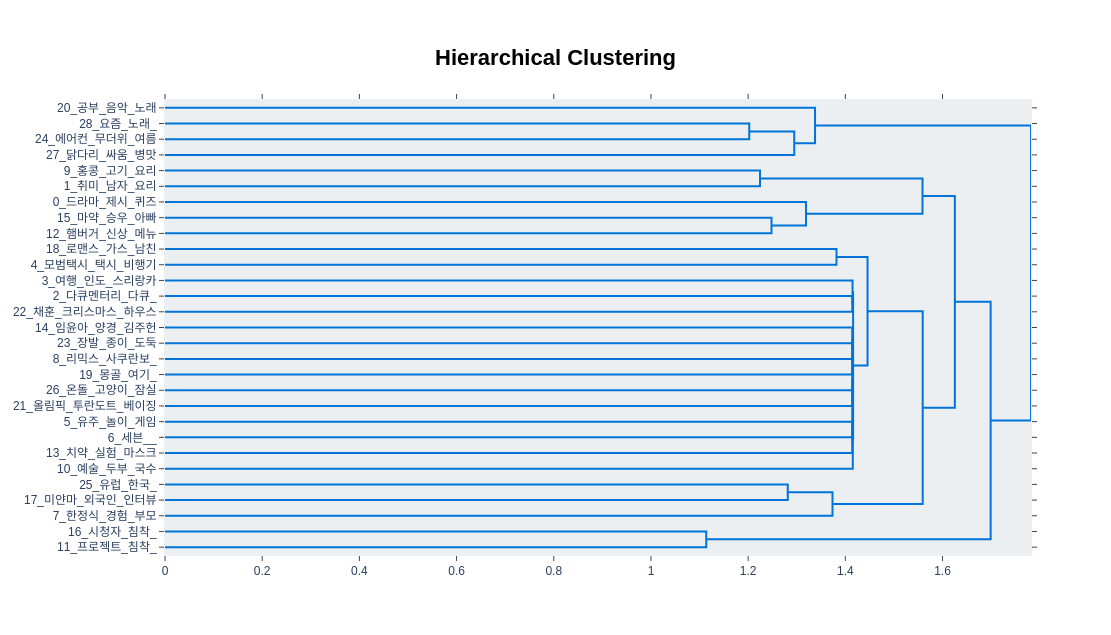

In [23]:
model.visualize_hierarchy(top_n_topics=30)

### Topic 별 계층별 visualize(People & Blog)

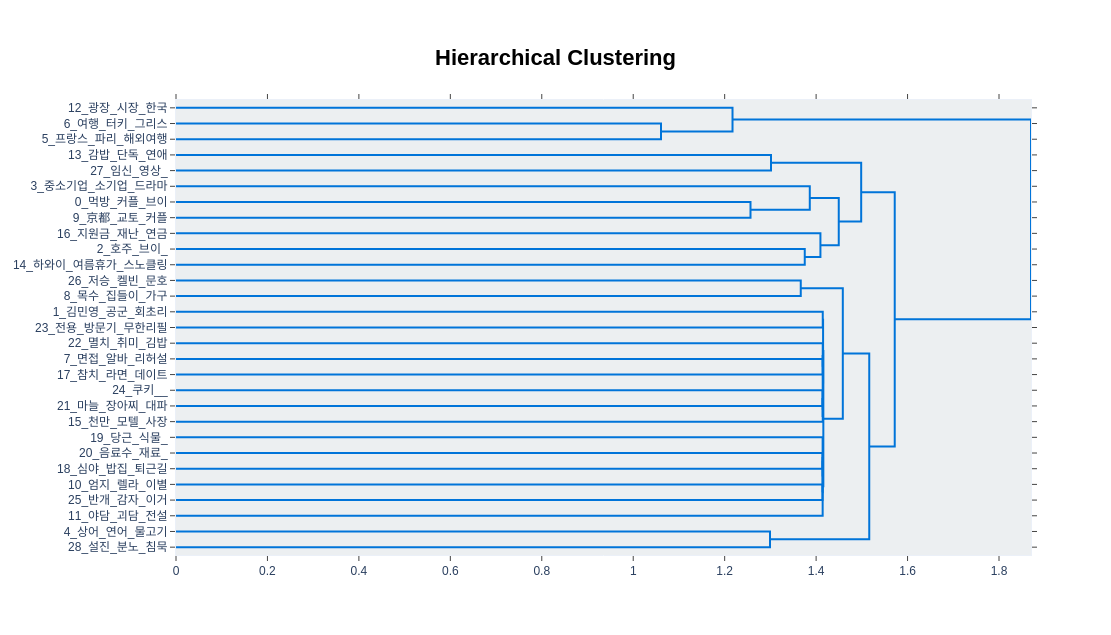

In [14]:
model.visualize_hierarchy(top_n_topics=30)

### Topic을 대표하는 Top Topic word 5(Entertainment)

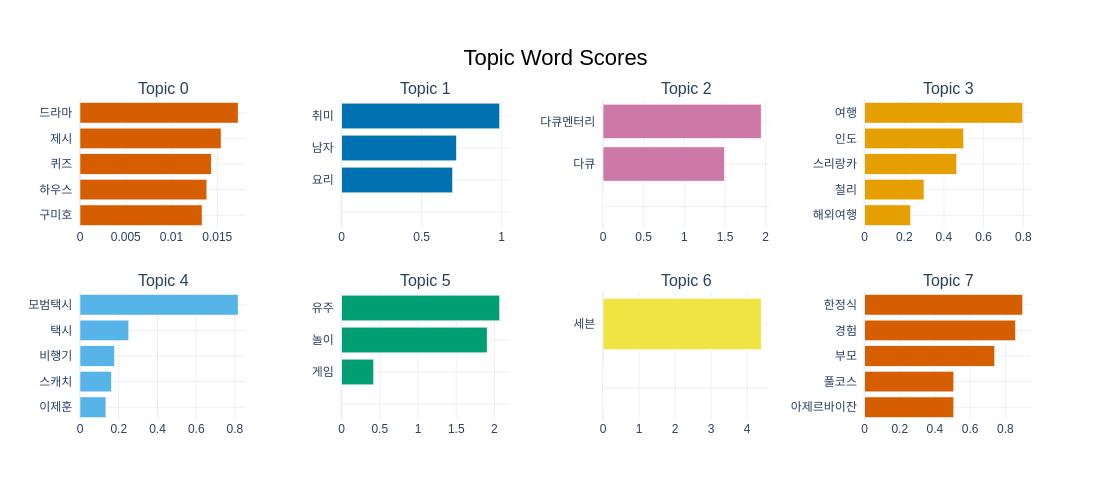

In [26]:
# Topic을 대표하는 상위 단어 5개씩 보여준다.
model.visualize_barchart(top_n_topics=8)

### Topic을 대표하는 Top Topic word 5(People & Blog)

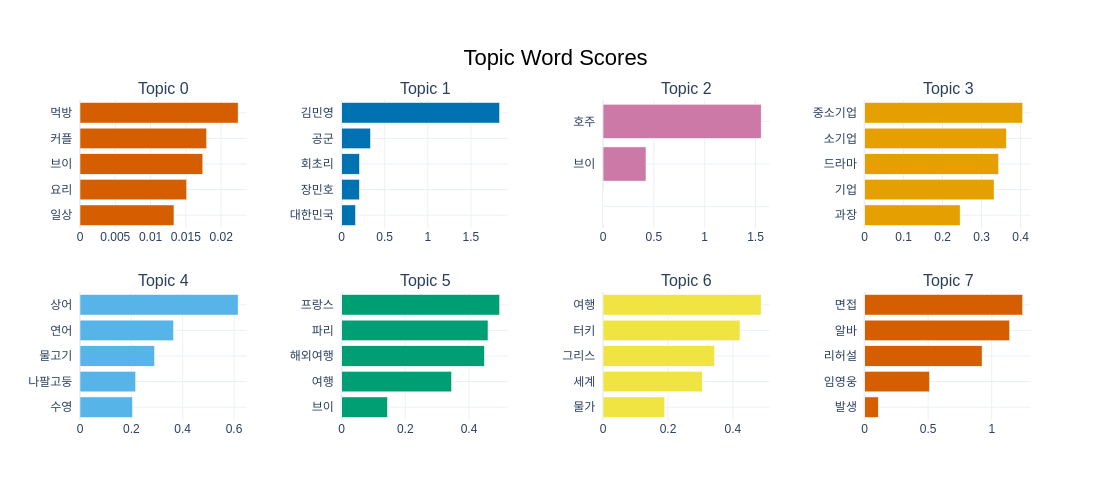

In [15]:
model.visualize_barchart(top_n_topics=8)

### Topic간 유사도를 Cosine Similarity로 계산후 Heatmap으로 표현(Enter)

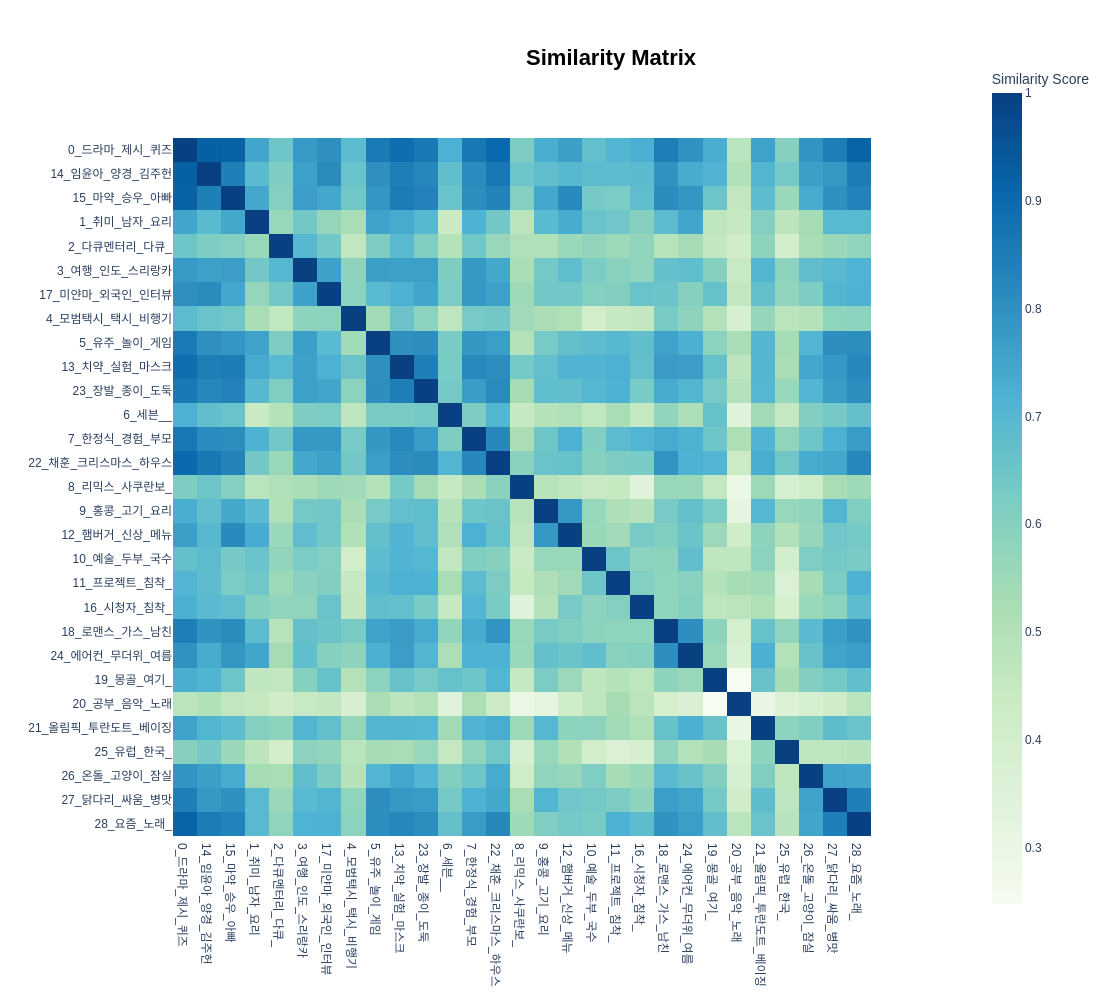

In [25]:
model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

### Topic간 유사도를 Cosine Similarity로 계산후 Heatmap으로 표현(People & Blog)

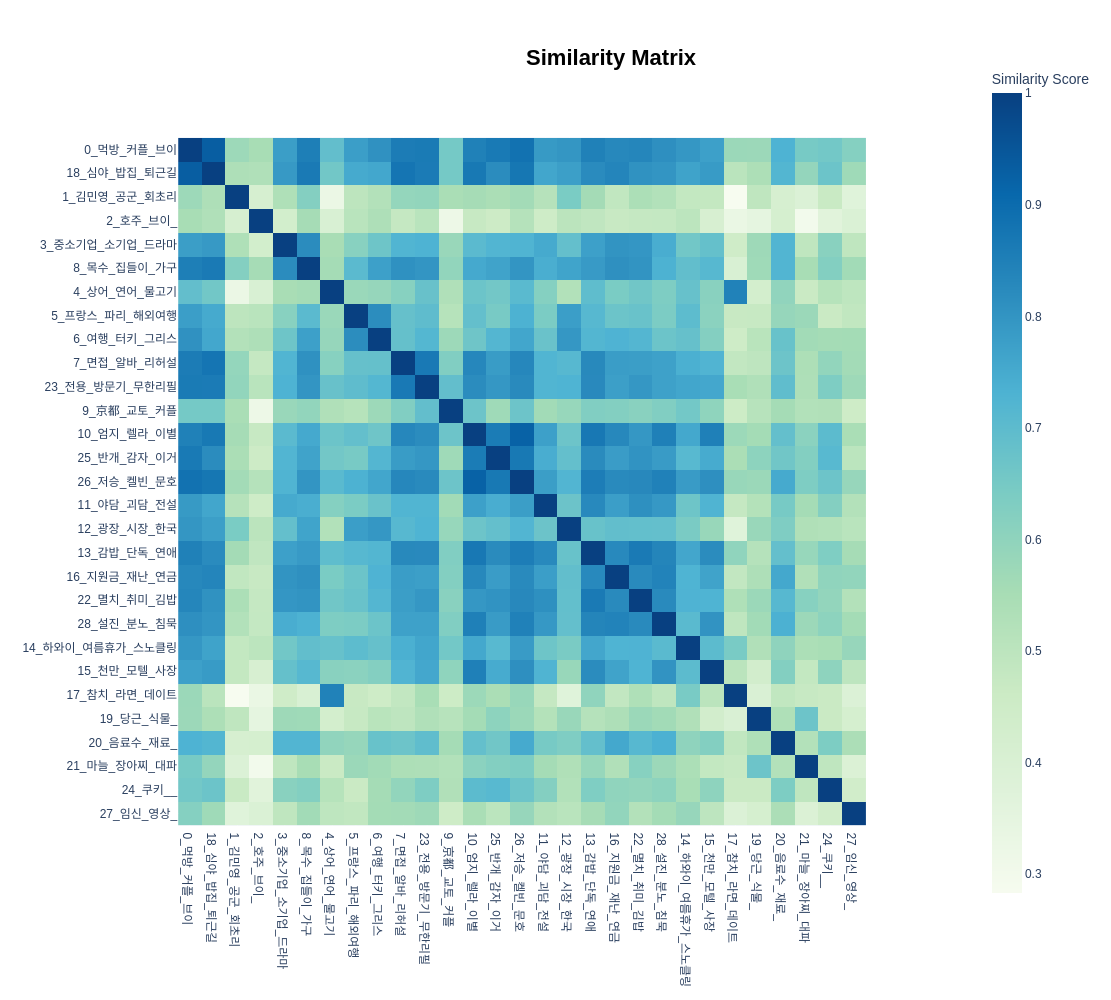

In [16]:
model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

### Topic내 대표하는 단어들에 대해서 c-tf-idf로 계산, 
### 각 단어가 Topic에서 차지하는 중요도를 계산했던 것을 Rank 순으로 나열

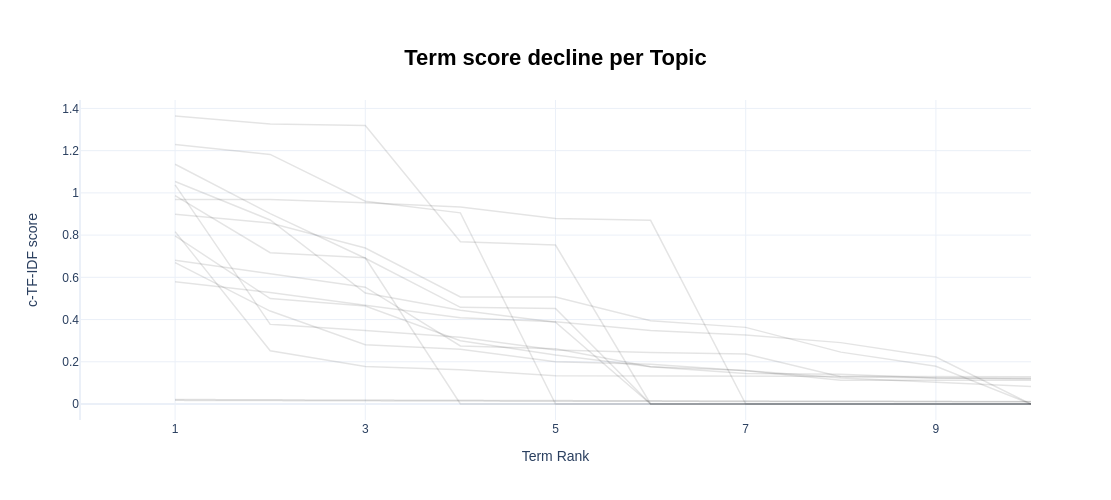

In [27]:
model.visualize_term_rank()

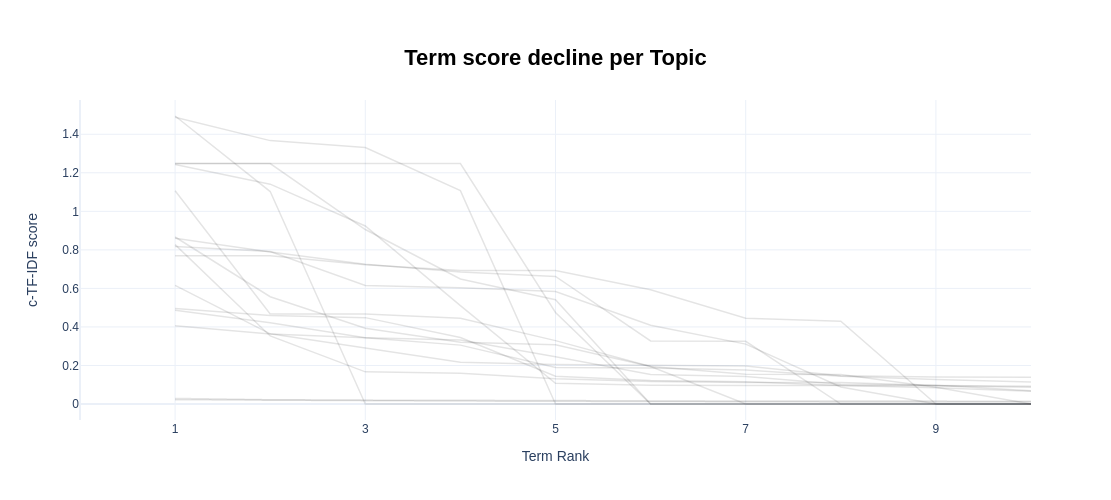

In [17]:
model.visualize_term_rank()

In [28]:
model.generate_topic_labels()

['-1_먹방_예능_퀴즈',
 '0_드라마_제시_퀴즈',
 '1_취미_남자_요리',
 '2_다큐멘터리_다큐_',
 '3_여행_인도_스리랑카',
 '4_모범택시_택시_비행기',
 '5_유주_놀이_게임',
 '6_세븐__',
 '7_한정식_경험_부모',
 '8_리믹스_사쿠란보_',
 '9_홍콩_고기_요리',
 '10_예술_두부_국수',
 '11_프로젝트_침착_',
 '12_햄버거_신상_메뉴',
 '13_치약_실험_마스크',
 '14_임윤아_양경_김주헌',
 '15_마약_승우_아빠',
 '16_시청자_침착_',
 '17_미얀마_외국인_인터뷰',
 '18_로맨스_가스_남친',
 '19_몽골_여기_',
 '20_공부_음악_노래',
 '21_올림픽_투란도트_베이징',
 '22_채훈_크리스마스_하우스',
 '23_장발_종이_도둑',
 '24_에어컨_무더위_여름',
 '25_유럽_한국_',
 '26_온돌_고양이_잠실',
 '27_닭다리_싸움_병맛',
 '28_요즘_노래_']

In [18]:
model.generate_topic_labels()

['-1_브이_먹방_일상',
 '0_먹방_커플_브이',
 '1_김민영_공군_회초리',
 '2_호주_브이_',
 '3_중소기업_소기업_드라마',
 '4_상어_연어_물고기',
 '5_프랑스_파리_해외여행',
 '6_여행_터키_그리스',
 '7_면접_알바_리허설',
 '8_목수_집들이_가구',
 '9_京都_교토_커플',
 '10_엄지_렐라_이별',
 '11_야담_괴담_전설',
 '12_광장_시장_한국',
 '13_감밥_단독_연애',
 '14_하와이_여름휴가_스노클링',
 '15_천만_모텔_사장',
 '16_지원금_재난_연금',
 '17_참치_라면_데이트',
 '18_심야_밥집_퇴근길',
 '19_당근_식물_',
 '20_음료수_재료_',
 '21_마늘_장아찌_대파',
 '22_멸치_취미_김밥',
 '23_전용_방문기_무한리필',
 '24_쿠키__',
 '25_반개_감자_이거',
 '26_저승_켈빈_문호',
 '27_임신_영상_',
 '28_설진_분노_침묵']

## 한계점 및 추후 연구 방안
  (1) 한계점
  
    1. 추출된 30개의 토픽들 중에서 주제에 맞지 않는 몇 가지의 단어들이 포함된 것을 볼 수 있었음
    2. 사용된 언어 모델은 유튜브 텍스트 데이터와 잘 맞지 않는 언어 모델이기에 주제를 잘 표현해내지 못함
    3. C-TF-IDF score의 그래프를 참조하면 Rank 3이상부터 점수 증가 폭이 작아지고 그로 인해서 주제가 단어의 표현을 적절하게 할 수 없음
    4. 유튜브의 동영상은 시간에 따라 변화하고 세계의 이슈나 상황에 따라서 새로운 트렌드가 등장할 수 있는데,
           BERTopic을 이용한 분석은 정적인 분석에서 그침
  
  (2) 추후 연구 방안
  
    1. 사용될 임베딩 모델을 유튜브 텍스트 데이터에 알맞는 임베딩 모델로 커스터마이징 작업이 필요함.
    2. 동적인 분석을 위한 시계열 모델이나, 감정 분석과의 통합을 고려하는 방향을 제시
    3. 워드넷(Wordnet)이라는 어휘목록을 이용하여 단어 별로 유의어에 대한 학습을 진행하여 주제에 맞지 않는 불순 단어를 
            약간이나마 필터링 해주는 작업을 고려.